<a href="https://colab.research.google.com/github/kelgruber/hand-gesture-classification/blob/main/Kel_Gruber_Final_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project Task 6: Explore Off-the-Shelf Tools

Kel Gruber

## Dataset - Hand Gesture Classification

Goal of this project is build a model that correctly classifies images of 5 different hand gestures. Dataset consists of over 2650 digital colored images that belong to 5 classes: dislike, like, peace, one, and stop. 2500 images came from the crowdsourced HaGRID dataset and 150 images were taken by Kel Gruber and classmate volunteers following the Hagrid dataset's collection guidelines.

The 2500 images originally came from this [HaGRID Sample 30k 384p Dataset](https://www.kaggle.com/datasets/innominate817/hagrid-sample-30k-384p) on Kaggle, this sample contains 30,000 images and all 18 classes.

##1. Load Preprocessed/Cropped Dataset

### Import libaries and connect to Drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Dataset from Drive and Unzip

In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/5390 Final Project/Cropped_Split_Data.zip')
zip_train.extractall('/tmp')
zip_train.close()

###Import Training, Validation, and Testing Datasets

The Teachable Machines model suggested code for using the model indicates that the model normalizes the data differently that our prior models. This model suggests you normalize the pixel values to be between [-1,1] instead of [0,1] which was used in the prior models.

In [ ]:
#Teachable Machines normalizes this way: normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
#this should have the image generator do the same
image_size = 224
image_generator = ImageDataGenerator(rescale=1./127.5, featurewise_center=True, featurewise_std_normalization=False)

testing_set = image_generator.flow_from_directory( '/tmp/Cropped_Split_Data/testing', target_size=(image_size , image_size), batch_size=1, class_mode='categorical')
print(testing_set.image_shape)

Found 530 images belonging to 5 classes.
(224, 224, 3)


###View Some Examples from the Training Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


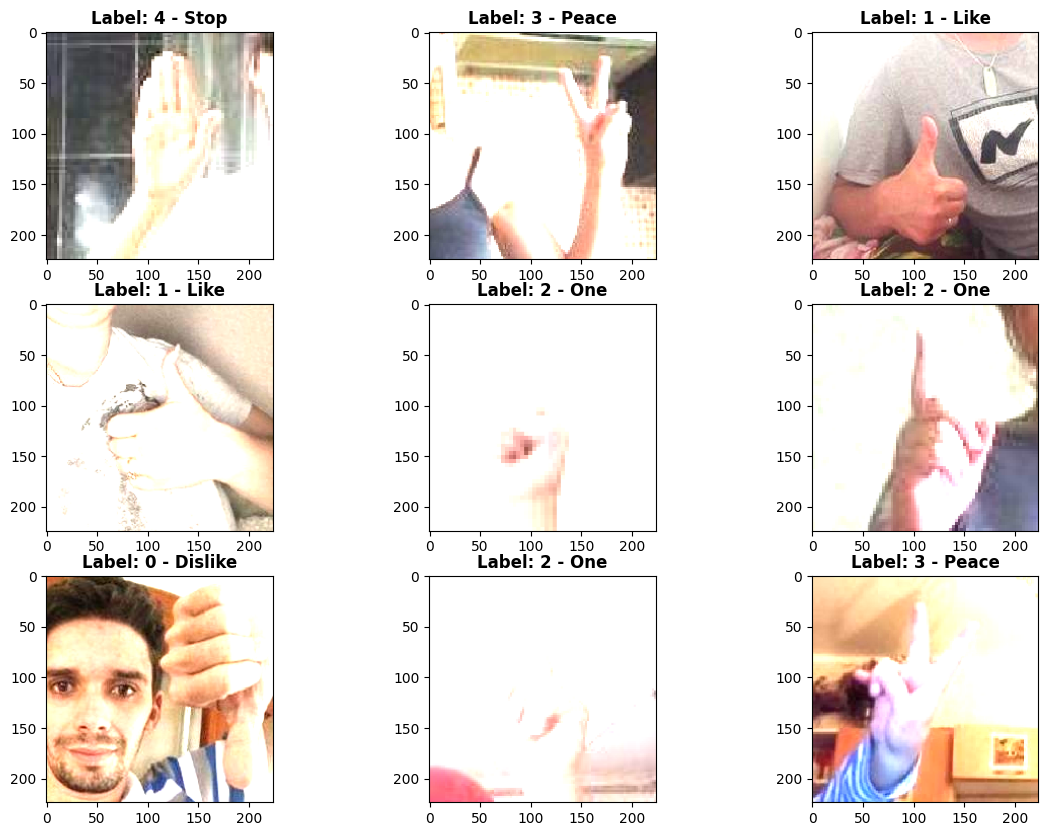

In [ ]:
i = 3
label_category = {0: "Dislike", 1: "Like", 2: "One", 3: "Peace", 4: "Stop"}

images = []
labels = []
for i in range(9):
    image, label = next(testing_set)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(14,10))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

The images look different in this view because Teachable Machine uses a different preprocessing technique where the images are normalized to be between [-1, 1] instead of [0,1].

##2. Teachable Machines Model for Preprocessed Data

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/cropped_keras_model.h5", compile=False)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 5)                 128600    
                                                                 
Total params: 538808 (2.06 MB)
Trainable params: 524728 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#####Evaluate Model on the Testing Set

*Please note that this set was not uploaded to Teachable Machines for training. This is data that the model has not seen.

In [ ]:
P = [] # empty list of predictions
Y_true = []

for i in range(len(testing_set)):
   x, y = testing_set.next()
   p = model.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = pred = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.590566037735849
Precision: 0.6277185096098338
Recall: 0.590566037735849
F1 Score: 0.5848026525587737


##3. Load Original Uncropped Dataset

### Import libaries and connect to Drive

###Import Dataset from Drive and Unzip

In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/5390 Final Project/Original_Split_Data.zip')
zip_train.extractall('/tmp')
zip_train.close()

###Import Training, Validation, and Testing Datasets

The Teachable Machines model suggested code for using the model indicates that the model normalizes the data differently that our prior models. This model suggests you normalize the pixel values to be between [-1,1] instead of [0,1] which was used in the prior models.

In [ ]:
#Teachable Machines normalizes this way: normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
#this should have the image generator do the same
image_size = 224
image_generator = ImageDataGenerator(rescale=1./127.5, featurewise_center=True, featurewise_std_normalization=False)

testing_set = image_generator.flow_from_directory( '/tmp/Original_Split_Data/testing', target_size=(image_size , image_size), batch_size=1, class_mode='categorical')
print(testing_set.image_shape)

Found 530 images belonging to 5 classes.
(224, 224, 3)


###View Some Examples from the Training Dataset

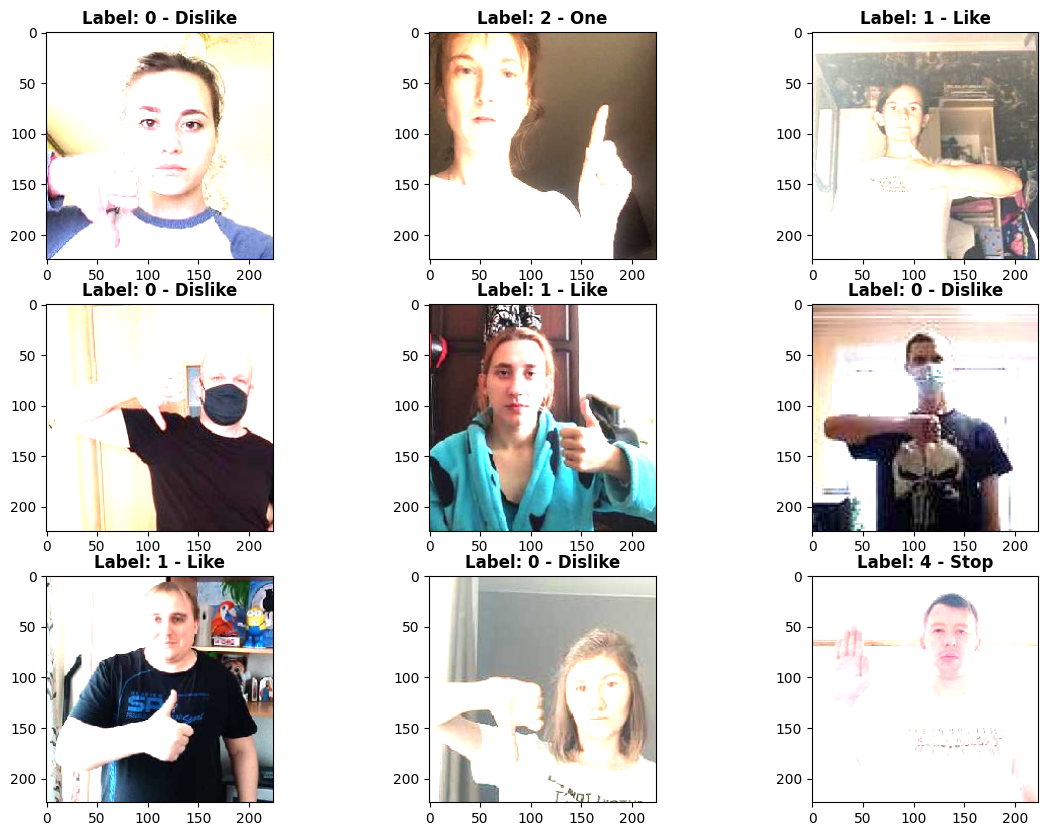

In [ ]:
i = 3
label_category = {0: "Dislike", 1: "Like", 2: "One", 3: "Peace", 4: "Stop"}

images = []
labels = []
for i in range(9):
    image, label = next(testing_set)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(14,10))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

The images look different in this view because Teachable Machine uses a different preprocessing technique where the images are normalized to be between [-1, 1] instead of [0,1].

##4. Teachable Machines Model using the Original Full Data

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/full_data_keras_model.h5", compile=False)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 5)                 128600    
                                                                 
Total params: 538808 (2.06 MB)
Trainable params: 524728 (2.00 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#####Evaluate Model on the Testing Set

*Please note that this set was not uploaded to Teachable Machines for training. This is data that the model has not seen.

In [ ]:
P = [] # empty list of predictions
Y_true = []

for i in range(len(testing_set)):
   x, y = testing_set.next()
   p = model.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = pred = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5283018867924528
Precision: 0.5506804635127802
Recall: 0.5283018867924528
F1 Score: 0.5186360082827167
